In [5]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [6]:
BASE_DIR = '/kaggle/input/flickr30k'
WORKING_DIR = '/kaggle/working'

In [7]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
# summarize
print(model.summary())

553476096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [8]:
# extract features from image
features = {}
directory = os.path.join(BASE_DIR, 'flickr30k_images')

for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

  0%|          | 0/31783 [00:00<?, ?it/s]

2023-02-10 15:57:08.011351: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-10 15:57:09.171697: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [9]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features30k.pkl'), 'wb'))

In [10]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features30k.pkl'), 'rb') as f:
    features = pickle.load(f)

In [11]:
with open(os.path.join(BASE_DIR, 'captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [12]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # split the line by comma(,)
    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/158916 [00:00<?, ?it/s]

In [13]:
len(mapping)

31783

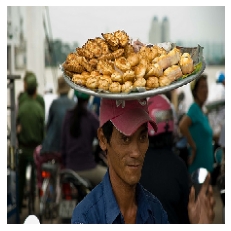

['0 a man wearing a red hat and blue top carries a tray on his head filled with some sort of baked goods .', '1 A man with a large plate of food on his head walks down a street .', '2 A man wearing a hat is balancing a tray of food on his head .', '3 A man is balancing a plate of food on his head .', '4 Wow  found a new way to serve food .']


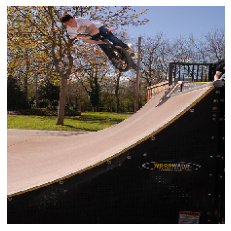

['0 A boy is doing tricks with his bike on the ramp .', '1 A teenage boy on a bicycle does tricks .', '2 A man on a bike jumping on a bike ramp .', '3 A boy rides his bike on a half-pipe .', '4 A cyclist gets airborne on a ramp .']


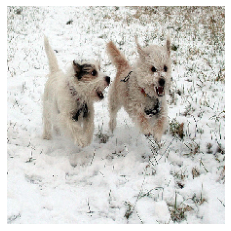

['0 Two white dogs are running along side one another in snowy grass .', '1 Two little white dogs are playing outside in the snow .', '2 Two little white dogs are playing in the snow .', '3 Two white dogs run through a fiels with snow .', '4 Two white dogs running in the snow .']


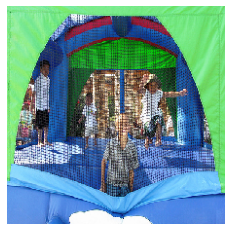

['0 A young boy poses behind the netting of an enclosed play area while three other children play .', '1 The little kids all play and jump around inside the inflatable toy .', '2 Children play in the blue and green jumping tent filled with air .', '3 Children playing in a green and blue bounce house .', '4 Four children are playing on a bouncy castle .']


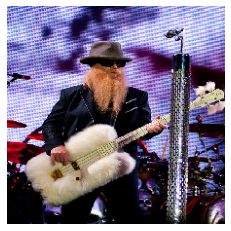

['0 A member of ZZ Top is playing a guitar covered with fur on a stage with a flashy microphone and stand in front of him .', '1 A gentleman with a long beard is at a concert playing a fur lined base guitar .', '2 Billy Gibbons of the band ZZ Top playing a fur covered bass guitar .', '3 A man with a long beard playing a guitar .', '4 A long bearded man plays a furry guitar .']


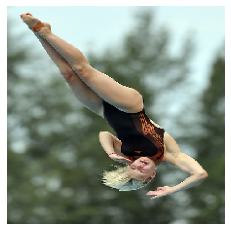

["0 A blond gymnast wearing a black suit with orange line 's tense focus can be seen in her face as she is photographed midair with her feet pointed to a tee and arms bent by her head .", '1 A blond woman wearing a black and orange swimsuit is caught in motion upside down with greenery in the background .', '2 A young female diver  wearing a black swimsuit  performing a stunt and currently upside-down .', '3 A gymnast wearing a black and orange suit in midair .', '4 A woman is performing a complicated dive .']


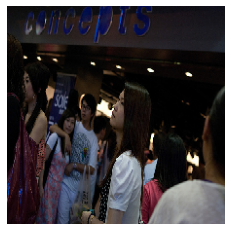

['0 " A woman with a white shirt is standing near a couple in front of a store called "" Concepts . """', '1 Asian couple holding each other  and a Asian girl glaring out into space .', '2 Asian people are standing outside a store named Concepts .', '3 Several asians in front of store concepts .', '4 People gathering in a mall .']


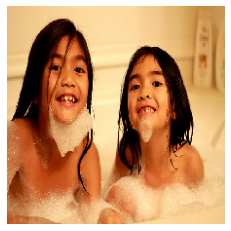

['0 Two young girls make funny faces out of the bubbles in their bath .', '1 Two little girls pose smiling in a bath with soap on their faces .', '2 Two female children are in a bath together .', '3 Two young girls are sharing a bubble bath .', '4 Two baby are bathing and enjoying .']


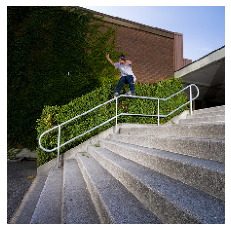

['0 A man is rollerblading down a white railing beside a red brick building .', '1 A male on Rollerblades skating down a railing next to stairs .', '2 A man is skating down a rail above some steps .', '3 A man slides a skateboard down a stair ramp .', '4 An in-line skater grinding on a rail .']


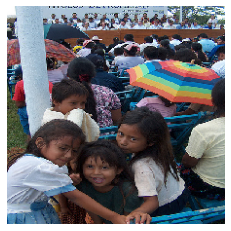

['0 Three young girls posing for a picture in an outdoor amphitheater  surrounded by adults watching a conference .', '1 A group of Asian children are part of an audience sitting on blue benches .', '2 Little girls ignoring the current adult procession going on', '3 Some children turned backwards while in the audience .', '4 Four kids turn around to be photographed .']


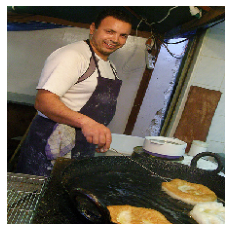

['0 A man in an apron smiles as he pokes a frying donut with a little metal stick .', '1 A man smiles at the camera as he fries his food in a large cast-iron pan .', '2 A man in a kitchen is frying breaded food in a cast iron pan .', '3 A man in an apron smiling as he fries food .', '4 A smiling man cooks something delicious .']


In [14]:
# before preprocess of text
path="/kaggle/input/flickr30k/flickr30k_images"
l=os.listdir(path)
c=0
for i in l:
    p=path+'/'+i
    img=load_img(p,target_size=(224,224,3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    cap=str(i).split(".")
    print(mapping[cap[0]])
    c+=1
    if c>10:
        break

In [15]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
        # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            caption = caption.lower()
            # delete digits, special chars, etc., 
            caption = caption.replace('[^A-Za-z]', '')
            # delete additional spaces
            caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in         caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [16]:
clean(mapping)

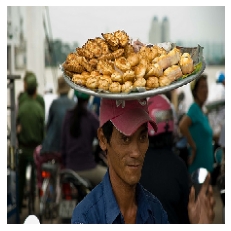

['startseq man wearing red hat and blue top carries tray on his head filled with some sort of baked goods endseq', 'startseq man with large plate of food on his head walks down street endseq', 'startseq man wearing hat is balancing tray of food on his head endseq', 'startseq man is balancing plate of food on his head endseq', 'startseq wow found new way to serve food endseq']


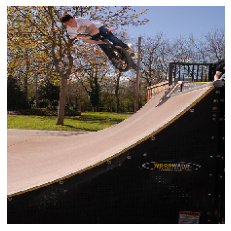

['startseq boy is doing tricks with his bike on the ramp endseq', 'startseq teenage boy on bicycle does tricks endseq', 'startseq man on bike jumping on bike ramp endseq', 'startseq boy rides his bike on half-pipe endseq', 'startseq cyclist gets airborne on ramp endseq']


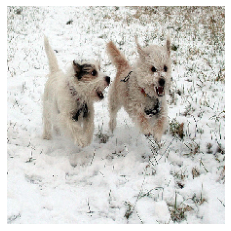

['startseq two white dogs are running along side one another in snowy grass endseq', 'startseq two little white dogs are playing outside in the snow endseq', 'startseq two little white dogs are playing in the snow endseq', 'startseq two white dogs run through fiels with snow endseq', 'startseq two white dogs running in the snow endseq']


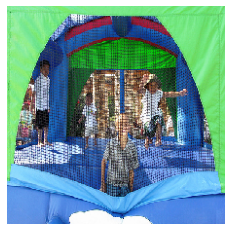

['startseq young boy poses behind the netting of an enclosed play area while three other children play endseq', 'startseq the little kids all play and jump around inside the inflatable toy endseq', 'startseq children play in the blue and green jumping tent filled with air endseq', 'startseq children playing in green and blue bounce house endseq', 'startseq four children are playing on bouncy castle endseq']


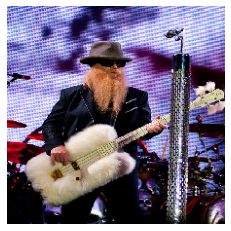

['startseq member of zz top is playing guitar covered with fur on stage with flashy microphone and stand in front of him endseq', 'startseq gentleman with long beard is at concert playing fur lined base guitar endseq', 'startseq billy gibbons of the band zz top playing fur covered bass guitar endseq', 'startseq man with long beard playing guitar endseq', 'startseq long bearded man plays furry guitar endseq']


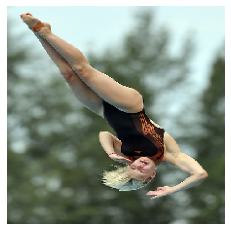

["startseq blond gymnast wearing black suit with orange line 's tense focus can be seen in her face as she is photographed midair with her feet pointed to tee and arms bent by her head endseq", 'startseq blond woman wearing black and orange swimsuit is caught in motion upside down with greenery in the background endseq', 'startseq young female diver wearing black swimsuit performing stunt and currently upside-down endseq', 'startseq gymnast wearing black and orange suit in midair endseq', 'startseq woman is performing complicated dive endseq']


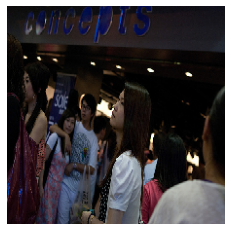

['startseq woman with white shirt is standing near couple in front of store called "" concepts """ endseq', 'startseq asian couple holding each other and asian girl glaring out into space endseq', 'startseq asian people are standing outside store named concepts endseq', 'startseq several asians in front of store concepts endseq', 'startseq people gathering in mall endseq']


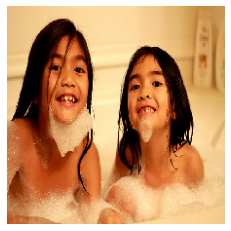

['startseq two young girls make funny faces out of the bubbles in their bath endseq', 'startseq two little girls pose smiling in bath with soap on their faces endseq', 'startseq two female children are in bath together endseq', 'startseq two young girls are sharing bubble bath endseq', 'startseq two baby are bathing and enjoying endseq']


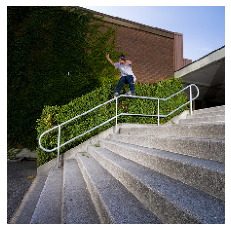

['startseq man is rollerblading down white railing beside red brick building endseq', 'startseq male on rollerblades skating down railing next to stairs endseq', 'startseq man is skating down rail above some steps endseq', 'startseq man slides skateboard down stair ramp endseq', 'startseq an in-line skater grinding on rail endseq']


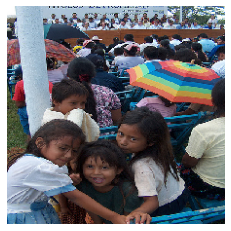

['startseq three young girls posing for picture in an outdoor amphitheater surrounded by adults watching conference endseq', 'startseq group of asian children are part of an audience sitting on blue benches endseq', 'startseq little girls ignoring the current adult procession going on endseq', 'startseq some children turned backwards while in the audience endseq', 'startseq four kids turn around to be photographed endseq']


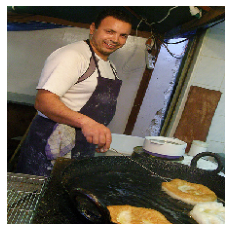

['startseq man in an apron smiles as he pokes frying donut with little metal stick endseq', 'startseq man smiles at the camera as he fries his food in large cast-iron pan endseq', 'startseq man in kitchen is frying breaded food in cast iron pan endseq', 'startseq man in an apron smiling as he fries food endseq', 'startseq smiling man cooks something delicious endseq']


In [17]:
# after preprocess of text
path="/kaggle/input/flickr30k/flickr30k_images"
l=os.listdir(path)
c=0
for i in l:
    p=path+'/'+i
    img=load_img(p,target_size=(224,224,3))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    cap=str(i).split(".")
    print(mapping[cap[0]])
    c+=1
    if c>10:
        break

In [18]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [19]:
len(all_captions)

158915

In [20]:
all_captions[:10]

['startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq',
 'startseq two young white males are outside near many bushes endseq',
 'startseq two men in green shirts are standing in yard endseq',
 'startseq man in blue shirt standing in garden endseq',
 'startseq two friends enjoy time spent together endseq',
 'startseq several men in hard hats are operating giant pulley system endseq',
 'startseq workers look down from up above on piece of equipment endseq',
 'startseq two men working on machine wearing hard hats endseq',
 'startseq four men on top of tall structure endseq',
 'startseq three men on large rig endseq']

In [21]:
# tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [22]:
vocab_size

18319

In [23]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

74

In [24]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [25]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
                    
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

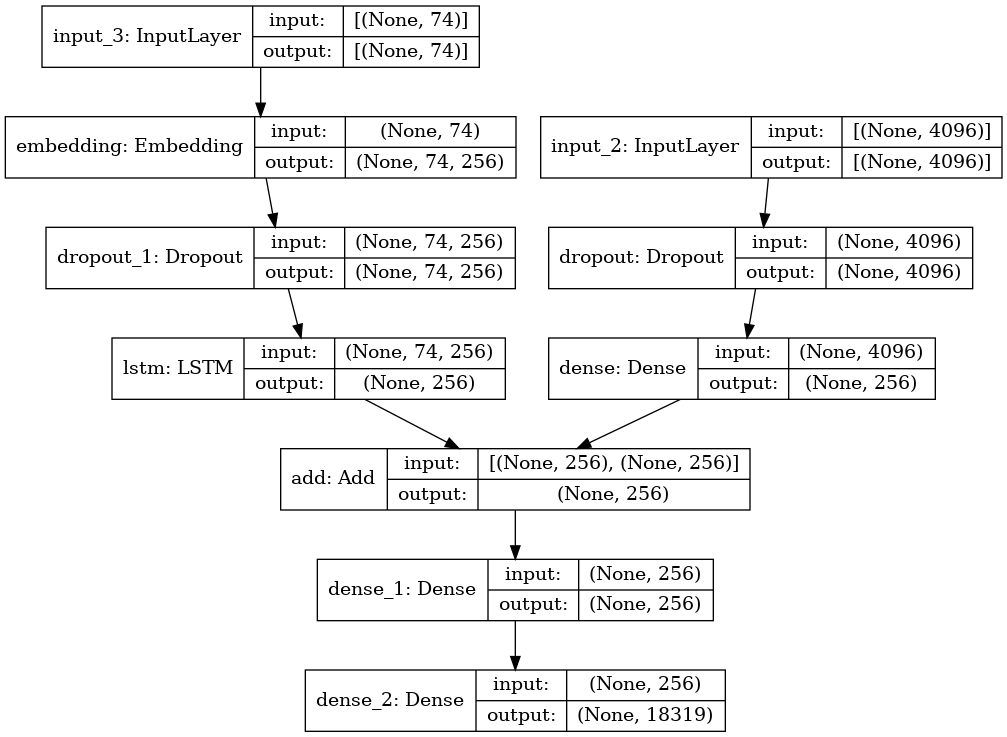

In [26]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [27]:
# train the model
epochs = 10
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

893/893 [==============================] - 490s 548ms/step - loss: 2.9405


In [28]:
# save the model
model.save(WORKING_DIR+'/backup_model30k.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [29]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [30]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
      
    return in_text

In [31]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
    
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/3179 [00:00<?, ?it/s]

BLEU-1: 0.541007
BLEU-2: 0.296905


In [43]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "flickr30k_images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)
    plt.axis('off')

---------------------Actual---------------------
startseq young man in jacket holding toothpick with something on the end of it endseq
startseq young man traveling on bus with piece of flower in his hands endseq
startseq teen holding an unknown object for photographers endseq
startseq young man on train holds an origami crane endseq
startseq you know am looking like justin bieber endseq
--------------------Predicted--------------------
startseq man in black shirt is holding toothpick endseq


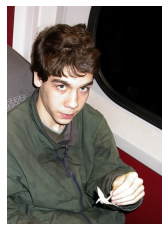

In [44]:
generate_caption("100759042.jpg")

---------------------Actual---------------------
startseq group of adults inside home sitting on chairs arranged in circle playing type of musical instruments endseq
startseq five musicians man and four women practicing sheet music (using flutes in living room endseq
startseq people gathered in circle some holding musical instruments endseq
startseq people gathered in room to talk about their favorite tunes endseq
startseq five people are sitting in circle with instruments endseq
--------------------Predicted--------------------
startseq group of people are sitting around table with their hands in the air endseq


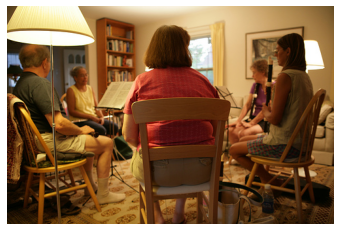

In [45]:
generate_caption("1003420127.jpg")

---------------------Actual---------------------
startseq man sleeping on bench outside with white and black dog sitting next to him endseq
startseq man lays on the bench to which white dog is also tied endseq
startseq man laying on bench holding leash of dog sitting on ground endseq
startseq shirtless man lies on park bench with his dog endseq
startseq man lays on bench while his dog sits by him endseq
--------------------Predicted--------------------
startseq two dogs are wrestling on the grass endseq


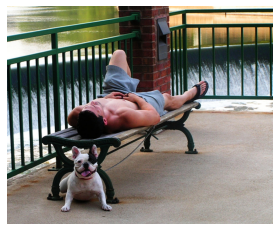

In [46]:
generate_caption("1003163366.jpg")

In [47]:
vgg_model = VGG16()
# restructure the model
vgg_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[-2].output)

In [48]:
dir_path='/kaggle/input/test-cap-img'
val_dir=os.listdir(dir_path)
print(val_dir)

['gratisography-frog-racer-free-stock-photo-800x525.jpg', 'random-numbers-dice.jpg', 'pexels-pixabay-247502.jpg', 'sq-ea8c12ac4c2946738c7d6c3d9c45692f.jpg', 'free-stock-photos.jpg', 'house-plants-1629187361.jpg']


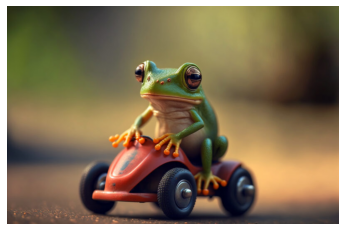

startseq man in black shirt is riding motorcycle endseq


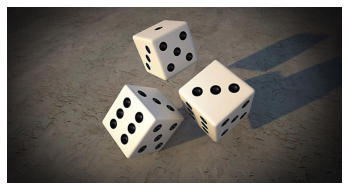

startseq man is standing in front of large wooden vessel with his head on his face endseq


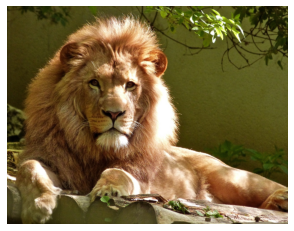

startseq two dogs are playing in the grass endseq


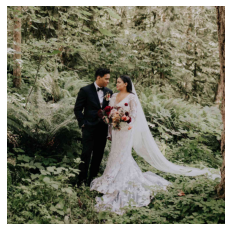

startseq man and woman are standing in front of large white statue endseq


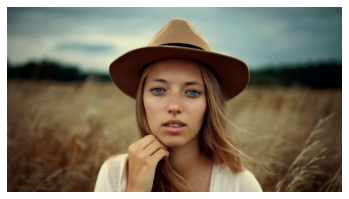

startseq woman with long hair is looking through the camera endseq


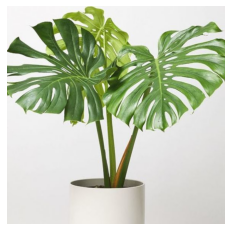

startseq little girl in pink tutu is covering her head endseq


In [49]:
dir_path='/kaggle/input/test-cap-img'
val_dir=os.listdir(dir_path)
for i in val_dir:
    image_path = os.path.join(dir_path,i)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    # load image
    image = load_img(image_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = vgg_model.predict(image, verbose=0)
    # predict from the trained model
    print(predict_caption(model, feature, tokenizer, max_length))